In [4]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [5]:
user_agent = "web:CS579:v1.0 (by u/Relevant-Fig-773)"

reddit = praw.Reddit(
    client_id="qy6TBi9qSnML8nLApahmvg",
    client_secret="_TjZdio3jXn7Gpy6e2ABszjNIBX02w",
    user_agent=user_agent,
)

In [6]:
subreddit = reddit.subreddit("championsleague")

G = nx.Graph()

# Fetch data from top 10 hot posts and their comments
for submission in subreddit.hot(limit=10):
    # Add the original post as the center node
    G.add_node(submission.id, title=submission.title, type="post")

    # Iterate through comments on the post
    for comment in submission.comments:
        # Check if the comment has a valid author
        if comment.author:
            # Add each commenting user as a node and connect them to the post
            G.add_node(comment.author, type="user")
            G.add_edge(submission.id, comment.author)

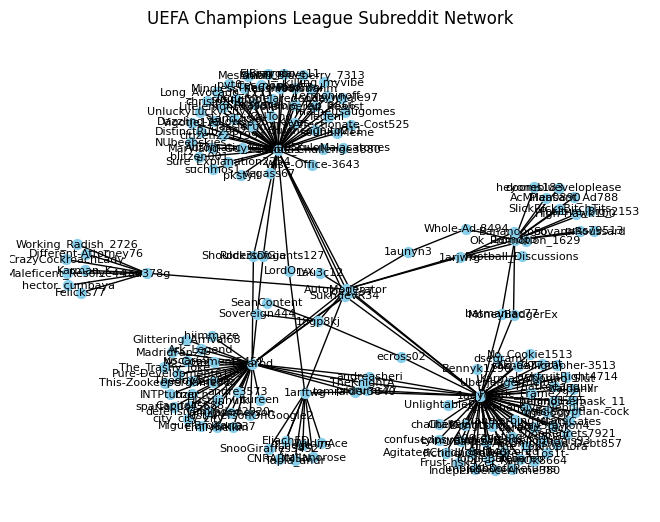

In [7]:
# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=50, node_color="skyblue", font_color="black")
plt.title("UEFA Champions League Subreddit Network")
plt.show()

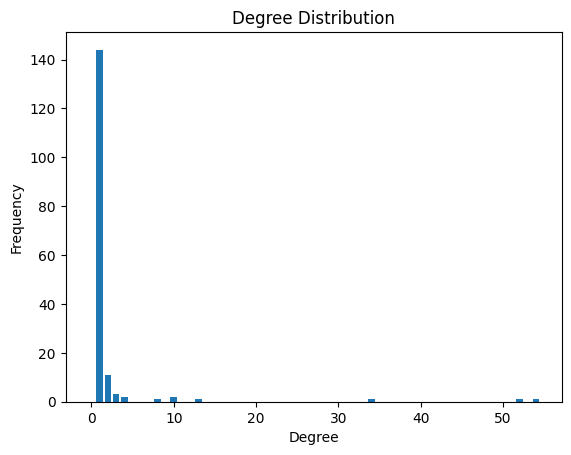

Degree Distribution: [0, 144, 11, 3, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

Network Measures:
Average Clustering Coefficient: 0.0
Pagerank:
  18gp8kj: 0.010367981058250517
  AutoModerator: 0.023183464275402604
  ecross02: 0.005237438468747915
  SeanContent: 0.0031010117166740308
  Sovereign444: 0.0031010117166740308
  1aunyn3: 0.005076790043617512
  Whole-Ad-8494: 0.005193451992665399
  1au378g: 0.02233175533534531
  Felicks77: 0.003270569059027442
  hector_cumbaya: 0.003270569059027442
  Karman_K: 0.003270569059027442
  Working_Radish_2726: 0.003270569059027442
  CrazyCockroachLady: 0.003270569059027442
  Different-Attorney76: 0.003270569059027442
  Maleficent_Resolve44: 0.003270569059027442
  1au3c12: 0.002869186134059773
  1aso0as: 0.1352245035178671
  Automatic_Taro6005: 0.0031082111199467054
  Pow67: 0.0031082111199467054
  Kyyes: 0.0031082111199467054
  suchmos1: 0.0

In [10]:
# Calculate network measures
degree_distribution = nx.degree_histogram(G)

# Plot Degree Distribution
plt.bar(range(len(degree_distribution)), degree_distribution, align="center")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Print Degree Distribution (if needed)
print("Degree Distribution:", degree_distribution)

# Calculate other network measures
clustering_coefficient = nx.average_clustering(G)
pagerank = nx.pagerank(G)
diameter = nx.diameter(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print other measures
print("\nNetwork Measures:")
print("Average Clustering Coefficient:", clustering_coefficient)
print("Pagerank:")
for node, value in pagerank.items():
    print(f"  {node}: {value}")
print("Diameter:", diameter)
print("Closeness Centrality:")
for node, value in closeness_centrality.items():
    print(f"  {node}: {value}")
print("Betweenness Centrality:")
for node, value in betweenness_centrality.items():
    print(f"  {node}: {value}")